In [1]:
import numpy as np 
from data_mining import *
import re
from collections import Counter
from matplotlib import pyplot as plt
from importingEXCEL import *
import bag_of_words_v2 as bow2
import time
import os 
from selection import *
import seaborn as sns
sns.set()

In [2]:
# Import ESG word list

ws = load_workbook(filename="ESG_word_list.xlsx")
sheetns = ws.sheetnames

Governance = importing(ws[sheetns[0]])

Environmental = importing(ws[sheetns[1]])

Social = importing(ws[sheetns[2]])

topics = [Governance, Environmental, Social]
topic_names = ['Governance', 'Environmental', 'Social']


In [14]:
#Import data as .txt

#Choose type of data
types = ['10-K', 'DEF 14A']
#Choose Companies
pa = os.getcwd().replace('\\', '/') +'/Top 40'
print(os.path.exists(pa))
tickers,years_for_each = find_good(pa)
#print(years_for_each)
print(tickers)
#Choose number of years

nb = 10
print(tickers)
Tech = ['AAPL','MSFT','NVDA','ADBE','INTC','ORCL','QCOM']
telecom = ['VZ','CSCO','CMCSA','NFLX','TMUS']
Banking = ['JPM','BAC','BLK','WFC']
Retail = ['AMZN','WMT','NKE','KO']
Health = ['UNH','ABT','MRK','PFE','TMO']
sect = [Tech,telecom,Banking,Retail,Health]
#import data
#import_data(nb, tickers, types, First=False)

True
['AAPL', 'MSFT', 'AMZN', 'JNJ', 'WMT', 'JPM', 'UNH', 'NVDA', 'BAC', 'VZ', 'CMCSA', 'ADBE', 'NFLX', 'KO', 'NKE', 'MRK', 'PFE', 'INTC', 'ORCL', 'ABT', 'CSCO', 'TMO', 'QCOM', 'TMUS']
['AAPL', 'MSFT', 'AMZN', 'JNJ', 'WMT', 'JPM', 'UNH', 'NVDA', 'BAC', 'VZ', 'CMCSA', 'ADBE', 'NFLX', 'KO', 'NKE', 'MRK', 'PFE', 'INTC', 'ORCL', 'ABT', 'CSCO', 'TMO', 'QCOM', 'TMUS']


In [15]:
nonotext = open(os.getcwd().replace("\\","/") +"/nonosquare.txt","r",encoding='utf-8')
nonolist = nonotext.readlines()[0].split(" ")
tickerselect = tickers[:4]
types = ['10-K', 'DEF 14A']
print(tickers)

['AAPL', 'MSFT', 'AMZN', 'JNJ', 'WMT', 'JPM', 'UNH', 'NVDA', 'BAC', 'VZ', 'CMCSA', 'ADBE', 'NFLX', 'KO', 'NKE', 'MRK', 'PFE', 'INTC', 'ORCL', 'ABT', 'CSCO', 'TMO', 'QCOM', 'TMUS']


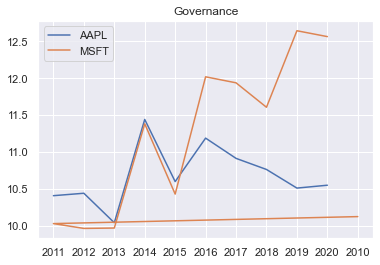

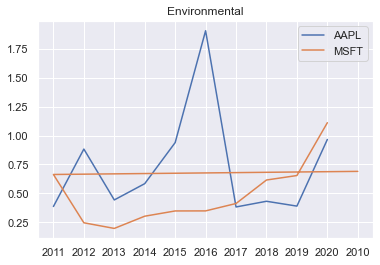

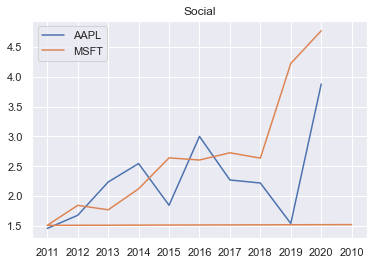

In [8]:
#Compute scores for each topic (each company, each year)
for topic, name in zip(topics, topic_names):
    for tick in tickerselect:
        score_10K = bow2.score_c_t(topic,tick,"10-K",nonolist)
        score_proxy = bow2.score_c_t(topic,tick,"DEF 14A",nonolist)
        merger= bow2.merge(score_10K,score_proxy,wP=0.5,wK=0.5)
        X,Y = bow2.plotting(merger)
        plt.plot(X,Y,label = tick)
        plt.legend()
    plt.title(name)
    plt.show()

In [11]:
#compute ESG score (each company, each year)
esg_score = {}
for tick in tickers:
    tick = tick.lower()
    #compute esg score as a mean across topics
    esg_score.update({tick: (np.array(topic_scores[0][tick])+np.array(topic_scores[1][tick])+np.array(topic_scores[2][tick]))/3})

In [12]:
print(esg_score)

{'aapl': array([5.86033805, 6.24130418, 6.03415983, 6.76011193, 6.23450273,
       7.35209718, 6.19802874, 2.14838396, 5.81672772, 6.94800806]), 'msft': array([5.56339113, 5.5576941 , 5.53966457, 6.34130034, 6.06019114,
       6.90575214, 6.95292467, 6.86798067, 7.99777497, 8.19373143]), 'amzn': array([ 4.43115067,  1.64983333,  4.34933579,  4.57980879,  5.21434301,
        5.33690136,  5.80957854,  5.45120847,  7.89156972, 10.46314875])}


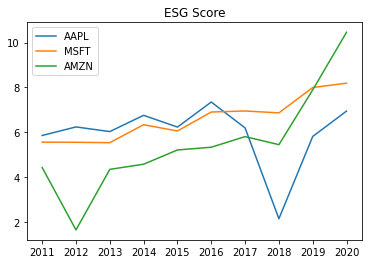

In [14]:
for tick in esg_score.keys():
    plt.plot(['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'], esg_score[tick], label = tick.upper())
    #plt.xticks([2018, 2019, 2020])
    plt.legend()
plt.title('ESG Score')
plt.show()

In [10]:
jad =["Ansgar","Toufika","Akdfsjslkd"]
print(jad.lower())

AttributeError: 'list' object has no attribute 'lower'